# Portfolio Prüfung II WWI2022B
Bitte bearbeiten Sie alle Aufgaben direkt  hier im Notebook und geben Sie die .ipynb-Datei am Ende der Portfolio-Prüfung [hier](https://privacy.dhbw-stuttgart.de/wwi2022b.html) ab.
Für Aufgaben die ohne Code erstellt werden, steht nach der Aufgabenstellung ein Markdown Antwortfeld zur Verfügung. 
Für Aufgaben bei denen ein Code verlangt wird, befindet sich nach der Aufgabenstellung ein interaktives Code-Feld (ggf. mit schon vorab ausgefüllten Code-Fragementen).

Viel Erfolg 

## Aufgabe 1 Python Basics
Ersetzen Sie im unten stehenden Code-Block die Beispiel Matrikelnummer durch Ihre eigene Nummer. 
Geben Sie dann mittels `print(...)`:
<ol type="a">
    <li>Ihre Matrikelnummer</li>
    <li>Den Hashwert Ihrer Matrikelnummer</li>
    <li>Wie oft jede Ziffer in Ihrer Matrikelnummer vorkommt</li>
</ol>
aus. 
Verwenden Sie für Aufgabenteil c) ein Python-Dictionary.

Beispielausgabe
```
Matrikelnummer:  1123456799
Hashwert:  257147394113209689
Anzahl der Ziffern [0-9]:  {'1': 2, '2': 1, '3': 1, '4': 1, '5': 1, '6': 1, '7': 1, '9': 2}
```


In [1]:
myNumber = '1123456799'
print("Matrikelnummer: ", myNumber)
print("Hashwert: ", hash(myNumber))

digitCounter = {}
for c in myNumber:
    if c in digitCounter:
        digitCounter[c] += 1
    else:
        digitCounter[c] = 1

print("Anzahl der Ziffern [0-9]: ", digitCounter)

Matrikelnummer:  1123456799
Hashwert:  5068779856908793809
Anzahl der Ziffern [0-9]:  {'1': 2, '2': 1, '3': 1, '4': 1, '5': 1, '6': 1, '7': 1, '9': 2}


In [17]:
# please run this cell once. You will need the imports for the cells below.
import matplotlib.pyplot as plt
import numpy as np
import timeit

### b) Plotten von Aufwand
Aus der Portfolio-Prüfung I kennen Sie die olgenden Funktionen `funktion1, funktion2, funktion3`:

In [3]:
# run once
def funktion1(n): # O(n)
    retValue = 0
    for i in range(n,0,-1):
        retValue += i
    return retValue

def funktion2(n): # O(n^2)
    lst = []
    for i in range(n*n):  
        lst.append(i)
        lst[i%n] += i
    return lst 

def funktion3(n): # O(1)
    lst = []
    for i in range(100):
       lst.append(i)
       for j in range(1,100,n):
          lst[i] = j
    return lst

Erzeugen Sie ein Experiment um die Komplexität der drei Funktionen empirisch zu messen und erzeugen Sie eine Grafik die den Aufwand veranschaulicht. (Führen Sie die Code-Zelle der Funktionen einmal aus, sonst kennt die Code-Zelle für die Erzeugung der Grafik die Funktionen nicht.)

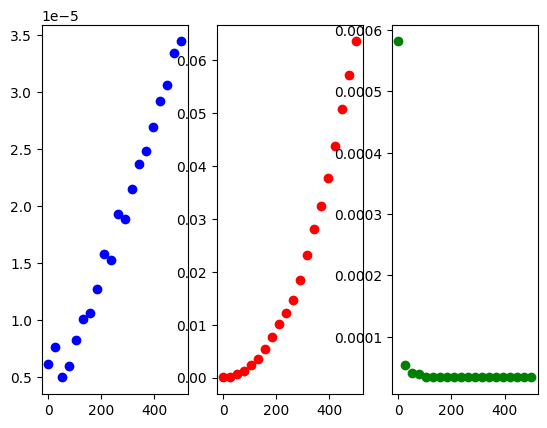

In [4]:
ns = np.linspace(1, 500, 20, dtype=int)

ts1 = [timeit.timeit(stmt=f'funktion1({n})', 
                     #setup= f'',
                     globals=globals(), 
                     number=3)
       for n in ns]

ts2 = [timeit.timeit(stmt=f'funktion2({n})', 
                     #setup= f'',
                     globals=globals(), 
                     number=3)
       for n in ns]

ts3 = [timeit.timeit(stmt=f'funktion3({n})', 
                     #setup= f'',
                     globals=globals(), 
                     number=3)
       for n in ns]

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.plot(ns, ts1, 'ob')
ax2.plot(ns,ts2,'or')
ax3.plot(ns,ts3,'og')

## Aufgabe 2 Linked Stack

Gegeben ist eine Implementierung für einen verlinkten Stack. Eine Mischung aus einem Stack und einer Linked-List.

In [11]:
class Stack:
    class Node:
        def __init__(self, val, next):
            self.val = val
            self.next = next

    def __init__(self):
        self.top = None
        self.size = 0

    def push(self, val):
        self.top = Stack.Node(val, self.top)
        self.size += 1

    def __len__(self):
        return self.size
          
    def __repr__(self):
        return '[' + ', '.join(str(x) for x in self) + ']'



### a) Vervollständigen der Definition
In der gegebenen Implementierung fehlt noch die Methode `pop()`, welche das oberste Element vom Stack nimmt, den Stack um dieses Element verkürzt und das Element zurückliefert. Außerdem fehlt noch die Methode `__iter__()`, mit welcher über die Liste iteriert werden kann.  Ergänzen Sie diese Methoden:

In [12]:
class Stack(Stack):
    
    def pop(self):
        val = self.top.val
        self.top = self.top.next
        self.size -= 1
        return val
    
    def __iter__(self):
        s = self.top
        while s:
            yield s.val
            s = s.next

In [13]:
# you can check your implementation with the following code
myStack = Stack()
for i in range(5):
    myStack.push(i)
print(myStack) # should be [4,3,2,1,0]
print(myStack.pop()) # should be 4
print(myStack.pop()) # should be 3
print(myStack) # should be [2,1,0]
print(len(myStack)) # should be 3

[4, 3, 2, 1, 0]
4
3
[2, 1, 0]
3


### b) Lineare und Binäre Suche
Implementieren Sie in der folgenden Codezelle die lineare Suche, sowie die binäre Suche nach einem Element `x` innerhalb des Stacks. 
Hinweis: Für die binäre Suche kann es hilfreich sein, zuerst die Methode `__getitem()__` zu implementieren.

In [14]:
class Stack(Stack):
    def linearSearch(self,x):
        # implements linear search on the stack
        # should return True if there is an node-element of the stack with value x 
        # otherwise False
        node = self.top
        while node:
            if node.val == x:
                return True
            else:
                node = node.next
        return False
    
    def __getitem__(self,idx):
        # implements indexing so self[idx] returns 
        # the value at index idx of the stack
        if idx < 0:
            idx += self.size
        assert idx >= 0 and idx < self.size 
        node = self.top
        for _ in range(idx):
            node = node.next
        return node.val
    
    def binarySearch(self,x):
        # implements binary search on the stack
        # should return True if there is an node-element of the stack with value x 
        # otherwise False
        lo = 0
        hi = self.size - 1
        while lo <= hi:
            mid = (lo + hi) // 2
            if x < self[mid]:
                hi = mid - 1
            elif x > self[mid]:
                lo = mid + 1
            else:
                return True
        else:
            return False

In [15]:
# you can check your implementation with the following code
myStack = Stack()
for i in range(5,0,-1):
    myStack.push(i)

print((myStack.binarySearch(6),myStack.linearSearch(6))) # should be (False, False)
print((myStack.binarySearch(1),myStack.linearSearch(1))) # should be (True, True)

(False, False)
(True, True)


### c) Aufwand von linearer und binärer Suche
Aus der Vorlesung wissen Sie, dass der Aufwand bei linearer Suche $O(n)$ und bei binärer Suche $O(log \ n)$ ist. Mit der folgenden Code-Zelle können Sie einen Visualisierung für den Vergleich von linearer mit binärer Suche für die in Aufgabenteil b) erzeugte Implementierungen erzeugen.

Stimmt auch in diesem Fall, dass die binäre Suche den Aufwand $O(n)$ hat? Beantworten und begründen Sie Ihre Antwort im Markdown-Feld nach der Grafik.

Sollten Sie Aufgabenteil b) nicht gelöst haben, verwenden Sie die auskommentierten Zeilen für das Experiment und begründen Sie warum der Aufwand für `__getitem__()` bei Python-Listen $O(1)$ ist.

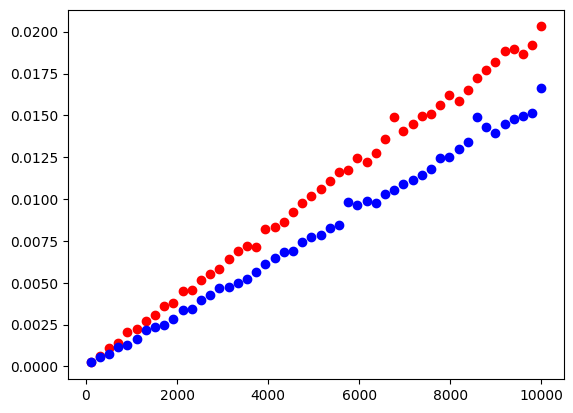

In [18]:
ns = np.linspace(100,10000,50,dtype=int)

def buildStack(n):
    retStack = Stack()
    for i in range(n,0,-1):
        retStack.push(n)
    return retStack


ts1 = [timeit.timeit(stmt=f'myStack.linearSearch(0)', setup=f'myStack = buildStack({n})',
#ts1 = [timeit.timeit(stmt=f'_ = myList[{n}-1]', setup=f'myList = list(range({n}))',                     
                     globals=globals(),
                     number= 100)
                     for n in ns
                     ]

ts2 = [timeit.timeit(stmt=f'myStack.binarySearch(0)', setup=f'myStack = buildStack({n})',
#ts2 = [timeit.timeit(stmt=f'_ = myList[0]', setup=f'myList = list(range({n}))', 
                     globals=globals(),
                     number= 100)
                     for n in ns
                     ]

plt.plot(ns, ts1, 'ro')
plt.plot(ns,ts2,'bo')

Beantworten Sie die Frage und begründen Sie Ihre Antwort in diesem Markdown-Feld. (Doppelklick auf den Text bringt Sie in den Bearbeitungsmodus.)

### d) Die Methode `roll`
Implementieren Sie eine Methode `roll` als Teil des Linked-Stacks. Die Methode besitzt einen Parameter $n \geq 2$. Sie verschiebt das oberste Element des Stacks an die $n$-te Stelle des Stacks.

Beispiele:

- wendet man `roll(3)` auf einen Stack mit den Werten A, B, C, D, E (wobei A das oberste Element ist) an, so ergibt sich als Ergebnis B, C, A, D, E

- wendet man `roll(5)` auf einen Stack mit den Werten  A, B, C, D, E an, so ergibt sich ein Stack mit den Werten (von oben nach unten) B, C, D, E, A

Einschränkungen/Annahmen:
- Ihre Implementierung darf keine Werte von Knoten (`node.val`) ändern. Stattdessen sollen lediglich die Verknüpfungen der Werte (`node.next`) verändert werden.
- Gehen Sie davon aus, dass $n$ mindestens den Wert 2 hat, und dass der Stack mindestens $n$-Werte hat.

In [37]:
class Stack(Stack):
    def roll(self, n):
        tempNode = self.top
        secondNode = self.top.next
        for i in range(n-1):
            tempNode = tempNode.next
        
        self.top.next = tempNode.next
        tempNode.next = self.top
        self.top = secondNode


In [38]:
# you can check your implementation with the following code:
myStack = Stack()
for i in range(5):
    myStack.push(i)
print(myStack) # should print [4, 3, 2, 1, 0]
myStack.roll(2)
print(myStack) # should print [3, 4, 2, 1, 0]
myStack.roll(3)
print(myStack) # should print [4, 2, 3, 1, 0]

[4, 3, 2, 1, 0]
[3, 4, 2, 1, 0]
[4, 2, 3, 1, 0]


### Zusatzaufgabe: Rekursion durch Stack abbilden 
(Diese Aufgabe gibt Bonuspunkte. Sie ist für das Bestehen des Portfolios nicht nötig.)

Aus der Vorlesung kennen Sie die Fibonacci-Folge, die rekursiv über folgenden Code erzeugt werden kann:

In [39]:
def fibonacciRecursive(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacciRecursive(n-1) + fibonacciRecursive(n-2)

Jede rekursive Funktion kann auch iterativ implementiert werden, in dem man mehrere Schleifen und (oft) einen Stack verwendet.
Verwenden Sie die oben gegebene Implementierung des Linked-Stacks um die Fibonacci-Folge ohne Rekursion, sondern mithilfe eines Stacks zu implementieren.

In [40]:
def fibbonacciIterative(n):
    stack = [n]
    result = 0
    while stack:
        #print(stack)
        n = stack.pop()
        if n == 0:
            result += 0
        elif n == 1:
            result += 1
        else:
            stack.append(n-1)
            stack.append(n-2)
    return result

In [41]:
# you can check the first 11 values of your implementation with the following lines of code:
for i in range(11):
    assert fibbonacciIterative(i) == fibonacciRecursive(i)

## Abgabe
Bitte denken Sie daran, ihre Notebook-Datei auf den Abgabe-Server hochzuladen.

https://privacy.dhbw-stuttgart.de/wwi2022b.html